# Bayesian vs Frequentist Approach: cosmic rays
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/bayesian_vs_frequentist_cosmicrays.ipynb)

This example (based on the notes) breaks down a Bayesian approach for dealing with hypothesis testing. You can run this notebook to see how your confidence in the "experts" will change the results likelihood.

### The Problem Setup

You've heard the hypothesis that variations in cosmic rays are driving the increase in global-mean temperatures we've seen over the last century, but you are very skeptical. You've been to a lot of seminars by experts in the field suggesting there is little evidence for this hypothesis. You calculate the correlation between incoming cosmic ray intensity and global-mean temperature and the resulting correlation has a p-value of 0.05. Should you now accept that cosmic rays are the answer and forget about $CO_2$?!

### The Frequentist
* $H_0:$ there is no real relationship between cosmic rays and global temperature increases
* $H_a:$ there is a real relationship between cosmic rays and global temperature increases
* $\alpha$-value $=0.05$

If you've chosen a confidence level of 95% ($\alpha = 0.05$), then you will conclude that you can "reject the null hypothesis" that there is no relationship between cosimic rays and global temperature increase.  Note that this approach doesn’t care about Ha, nor does it care about all the evidence against cosmic rays.

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy.stats as stats


import matplotlib as mpl


mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

### The Bayesian
* $R:$ cosmic rays are driving the increase in global mean temperature
* $\tilde{R}:$ cosmic rays are not
* $E:$ the evidence obtained from the data, e.g. the correlation
* Want: $\textbf{Pr}(R|E)$
* Know: $\textbf{Pr}(E|\tilde{R}) = 0.05$

#### Bayes' Theorem
$\textbf{Pr}(R|E) = \frac{\textbf{Pr}(E|R)\textbf{Pr}(R)}{\textbf{Pr}(E|R)\textbf{Pr}(R) + \textbf{Pr}(E|\tilde{R})\textbf{Pr}(\tilde{R})} $

Need to Know: $\textbf{Pr}(E|R), \textbf{Pr}(R)$

#### Expert Opinion
$\textbf{Pr}(R)$ is the prior probability - what you thought the likelihood that cosmic rays were driving the temperature changes *before* analyzing the data. 

In [2]:
P_R = .01 # probability of R; you are very skeptical
P_nR = 1.0-P_R # probability of not R
P_E_nR = 0.05 # probability of the evidence given the null is true (i.e. not R)

We also need to know $\textbf{Pr}(E|R)$, that is, the probability of getting the correlation you did if cosmic rays *are* causing the temperature changes. This one is tricky. For now, let's say that you believe if there was an influence of cosmic rays, you would very likely calculate a correlation as big (or bigger) than what you actually did.

In [3]:
P_E_R = 0.95 # probability of evidence given cosmic rays are the true cause - you think that is likely

Plugging into Bayes' Theorem

In [4]:
numerator = P_E_R*P_R
denominator = P_E_R*P_R + P_E_nR*P_nR
P_R_E = numerator/denominator

#### Likelihood cosmic rays are causing global warming given your evidence:

In [5]:
print(str(np.round(P_R_E*100)) + '%')

16.0%


#### Likelihood your null hypothesis is still true after the evidence:

In [6]:
print(str(np.round((1-P_R_E)*100)) + '%')

84.0%


The likelihood is lower than your p-value (0.05) because you’ve allowed your prior knowledge to come into the calculation - you thought that the hypothesis was unbelievable (a “rare event”) to begin with.

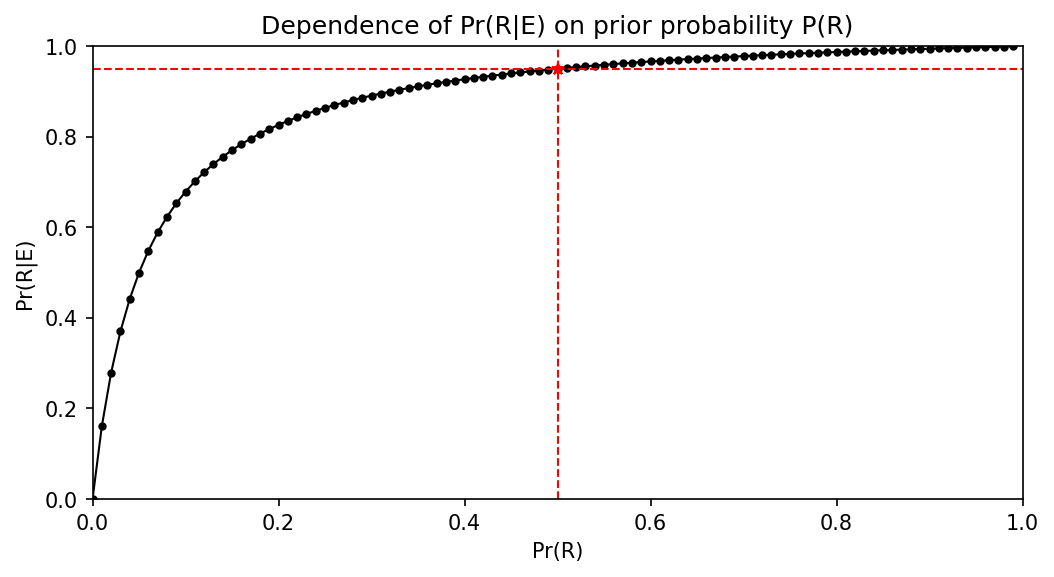

In [21]:
p_r_vec = np.arange(0,1.0,.01)
p_r_e_vec = []

for p_r in p_r_vec:
   
    p_nr = 1.0 - p_r

    numerator = P_E_R*p_r
    denominator = P_E_R*p_r + P_E_nR*p_nr
    p = numerator/denominator
    p_r_e_vec = np.append(p_r_e_vec, p)
    
plt.figure(figsize=(8,4))
plt.plot(p_r_vec,p_r_e_vec, '.-k', linewidth = 1.0)

# if you have no prior knowledge, then Pr(R) = .5 and Pr(R|E) = 95% assuming Pr(E|R) = .95
plt.plot(.5, p_r_e_vec[p_r_vec==.5],'*r') 
plt.axvline(x=.5, color = 'r', linestyle='--', linewidth = 1.)
plt.axhline(y=p_r_e_vec[p_r_vec==.5], color = 'r', linestyle='--', linewidth = 1.)

plt.ylim(0,1.0)
plt.xlim(0,1.0)
plt.ylabel('Pr(R|E)')
plt.xlabel('Pr(R)')
plt.title('Dependence of Pr(R|E) on prior probability P(R)')
plt.show()